In [88]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import math

# A

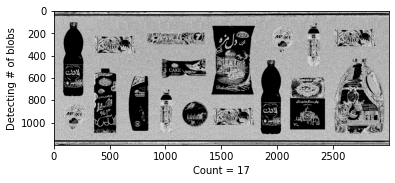

In [89]:
img = cv2.imread(r"C:\Users\fateme\Desktop\P3\cart_1.png", 0)

ret, thresh = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV)   # every pixel below the threshold is turned white
ret, thresh_final = cv2.threshold(thresh, 0, 30, cv2.THRESH_TOZERO)  # every pixel below the threshold is turned black

# applying morphological operaations to reduce noise
kernel = np.ones((3,3), np.uint8)
morph_img = cv2.erode(thresh_final, kernel, iterations=1)
morph_img = cv2.dilate(thresh_final,kernel)
morph_img = thresh_final - morph_img


blob, hierarchy = cv2.findContours(morph_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
blob_count = len(blob)

plt.imshow(morph_img, 'gray')
plt.xlabel("Count = " + str(blob_count))
plt.ylabel("Detecting # of blobs")

plt.show()

# B

number of tiny : 3


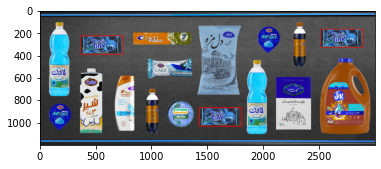

In [37]:
#tiny counter
img_rgb = cv2.imread(r"C:\Users\fateme\Desktop\P3\cart_1.png")
template = cv2.imread(r"C:\Users\fateme\Desktop\P3\objects\5.png")
h,w = template.shape[:-1]

res = cv2.matchTemplate(img_rgb, template, cv2.TM_CCOEFF_NORMED)
threshold = .8
loc = np.where(res >= threshold)
f = set()

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,0), 3)

    sensitivity = 100
    f.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))

plt.imshow(img_rgb)
found_count = len(f)
print('number of tiny : '+str(found_count))

# drink

In [45]:
drinks = [cv2.imread(file) for file in glob.glob(r"C:\Users\fateme\Desktop\P3\drink\*.png")]

In [58]:
drink_name = ['soda ','milk ']
price_drink =[6500,30000]
total_drink_cost = 0

for i in range(0,len(drinks)):
    img_rgb = cv2.imread(r"C:\Users\fateme\Desktop\P3\cart_1.png")
    template = images[i]
    h, w = template.shape[:-1]
    
    res = cv2.matchTemplate(img_rgb, template, cv2.TM_CCOEFF_NORMED)

    threshold = .8
    loc = np.where(res >= threshold)
    f = set()
    total_cost = 0
    
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

        sensitivity = 110
        f.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))

#   cv2.imwrite('result_{}.png'.format(i),img_rgb)
    found_count = len(f)
    total_drink_cost +=(price_drink[i]*found_count)
    print(drink_name[i] +str(found_count))
print('totol drink price : ' + str(total_drink_cost))

soda 1
milk 1
totol drink price : 36500


# D

In [103]:
mihan = [cv2.imread(file) for file in glob.glob(r"C:\Users\fateme\Desktop\P3\mihan\*.png")]

In [108]:
for i in range(0,len(mihan)):
    img_rgb = cv2.imread(r"C:\Users\fateme\Desktop\P3\cart_1.png")
    template = images[i]
    h, w = template.shape[:-1]
    
    res = cv2.matchTemplate(img_rgb, template, cv2.TM_CCOEFF_NORMED)

    threshold = .55
    loc = np.where(res >= threshold)
    f = set()
    found_count = 0   
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

        sensitivity = 110
        f.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))

#   cv2.imwrite('result_{}.png'.format(i),img_rgb)
    found_count += len(f)
 
print('number of mihan products :' + str(found_count))

number of mihan products :4


# E

In [53]:
images = [cv2.imread(file) for file in glob.glob(r"C:\Users\fateme\Desktop\P3\objects\*.png")]

In [114]:
objects = ['tuna   ','persil ','soda   ','milk   ','tiny   ','crest  ','cake   ','oil    ','maxi   ','shampoo','tea    ','chips  ']
price =[40000, 83000,6500,30000,5000,50000,8000,108000,6000,139000,144000,36000]
total_cost = 0
print('name    number      price')
print('------------------------------------')

for i in range(0,len(images)):
    img_rgb = cv2.imread(r"C:\Users\fateme\Desktop\P3\cart_1.png")
    template = images[i]
    h, w = template.shape[:-1]
    
    res = cv2.matchTemplate(img_rgb, template, cv2.TM_CCOEFF_NORMED)

    threshold = .8
    loc = np.where(res >= threshold)
    f = set()

    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

        sensitivity = 110
        f.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))

#     cv2.imwrite('result_{}.png'.format(i),img_rgb)
    found_count = len(f)
    total_cost += (price[i]*found_count) 
    print(objects[i]+'  ' +str(found_count)+'           '+str(price[i]))

print('---------------------------------------------')
print('\n total price of basket : ' + str(total_cost))

name    number      price
------------------------------------
tuna     1           40000
persil   1           83000
soda     1           6500
milk     1           30000
tiny     1           5000
crest    2           50000
cake     1           8000
oil      3           108000
maxi     1           6000
shampoo  1           139000
tea      2           144000
chips    2           36000
---------------------------------------------

 total price of basket : 1101500
